In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

### Load in raw recording data

In [235]:
recording_folder = r'G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001'
# recording_folder = r'G:/Grant/rotation/2023-09-29_16-07-39_PaBont2'

experimenter = 'grh'
experiment_description= 'Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A'] 
probedepths = [1500] 

### Read in .txt files with event times logged as frame numbers

In [236]:
stim_path = r"G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001\session003\20240107_christielab_session003_frontCam_events.txt"


# Create dictionaries to store the data
pellet_detected_data = {}
pellet_delivery_data = {}

# Open and read the text file
with open(stim_path, 'r') as file:
    lines = file.readlines()

# Iterate through the lines and parse the data
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 2:
        name, value = parts
        value = int(value)
        if name == 'pellet_detected':
            if name in pellet_detected_data:
                pellet_detected_data[name].append(value)
            else:
                pellet_detected_data[name] = [value]
        elif name == 'pellet_delivery':
            if name in pellet_delivery_data:
                pellet_delivery_data[name].append(value)
            else:
                pellet_delivery_data[name] = [value]

pellet_detected_frame = pellet_detected_data['pellet_detected']
print("Pellet Detected Values:", pellet_detected_frame)
pellet_delivery_frame = pellet_delivery_data['pellet_delivery']
print("Pellet Delivery Values:", pellet_delivery_frame)


# Divide each value by 150
pellet_detected_seconds = [value / 150 for value in pellet_detected_frame]
pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame]

print(pellet_delivery_seconds)
print(pellet_detected_seconds)


Pellet Detected Values: [5080, 10261, 13149, 18276, 23493, 28618, 32996]
Pellet Delivery Values: [5117, 10298, 13187, 18314, 23547, 33036]
[34.11333333333334, 68.65333333333334, 87.91333333333333, 122.09333333333333, 156.98, 220.24]
[33.86666666666667, 68.40666666666667, 87.66, 121.84, 156.62, 190.78666666666666, 219.97333333333333]


### load in .txt file containing each frame number. stored as time between frame in nano-seconds

In [237]:
frame_path = r"G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001\session003\20240107_christielab_session003_frontCam_timestamps.txt"
# Initialize an empty list to store the numbers
frames = []

# Open and read the text file
with open(frame_path, 'r') as file:
    for line in file:
        number = int(line.strip())
        frames.append(number)

# Now, 'numbers' is a list containing all the numbers from the text file
print("Numbers Array:", frames)
print("total frames: ", len(frames))

# frame_numbers = [index + 1 for index in range(len(frames))]
frame_numbers = [(index + 1) / 150 for index in range(len(frames))]
frames_txt_file = [(index + 1) for index in range(len(frames))]



print('frame numbers: ', frame_numbers)
print(len(frame_numbers)/150)
len(frames_txt_file)




Numbers Array: [6667344, 6666648, 6667304, 6667648, 6666488, 6667752, 6667192, 6666864, 6667728, 6667352, 6666896, 6667048, 6667600, 6667616, 6666952, 6667536, 6666376, 6668088, 6666648, 6667352, 6667672, 6666808, 6667624, 6666760, 6667160, 6668024, 6666864, 6666976, 6667648, 6667464, 6667264, 6667248, 6666784, 6667240, 6667112, 6667784, 6667080, 6667352, 6666672, 6667896, 6667024, 6666592, 6667736, 6666776, 6667872, 6667512, 6667240, 6666624, 6667920, 6666592, 6667864, 6667112, 6667240, 6666760, 6667264, 6666976, 6667680, 6667264, 6667520, 6666944, 6667296, 6667592, 6666728, 6667784, 6666704, 6667512, 6667000, 6667488, 6667408, 6667408, 6666696, 6667032, 6667160, 6667808, 6666784, 6667216, 6667736, 6667400, 6667192, 6666544, 6667696, 6666872, 6667832, 6666760, 6667704, 6667240, 6666920, 6667672, 6667384, 6667024, 6667056, 6667000, 6666920, 6667944, 6666864, 6667160, 6667952, 6666456, 6667488, 6667320, 6667352, 6666736, 6667376, 6667568, 6667456, 6666896, 6667320, 6667272, 6667376, 666

34906

### Plot the time between each frame, to see drop frames

total frame timestamps: 34906
recording duration seconds: 232.70666666666668


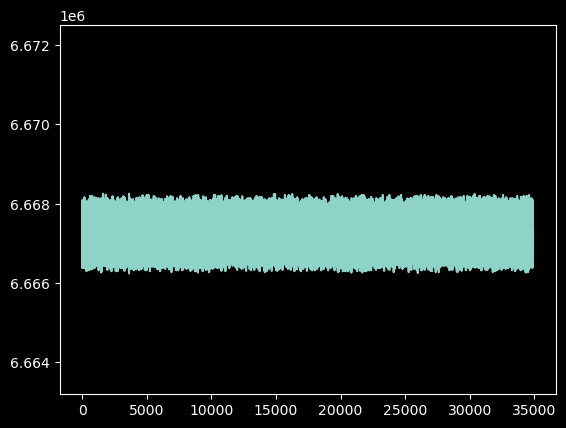

In [238]:
txt_file_frame_count = len(frames)
print("total frame timestamps:", txt_file_frame_count)
print("recording duration seconds:", txt_file_frame_count/150)
plt.ylim(6663200, 6672500)
plt.plot((frames))


### Load in the events data, logged in the digial lines of the openephys aquisition. and stored in the events folder of your recording

In [239]:
from open_ephys.analysis import Session

directory = recording_folder # for example

session = Session(recording_folder)

In [240]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)#

In [241]:
events_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,7,898175,29.502400,102,2,PXIe-6341,0
1,1,896342,29.502406,100,0,ProbeA-AP,0
2,1,74695,29.502410,100,1,ProbeA-LFP,0
3,1,911342,30.002440,100,0,ProbeA-AP,1
4,1,75945,30.002442,100,1,ProbeA-LFP,1
...,...,...,...,...,...,...,...
36375,1,8126354,270.522165,100,0,ProbeA-AP,0
36376,7,8128768,270.522167,102,2,PXIe-6341,0
36377,1,8141354,271.022187,100,0,ProbeA-AP,1
36378,1,678446,271.022202,100,1,ProbeA-LFP,1


In [242]:
session.recordnodes[0].recordings[0].events

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,7,898175,29.502400,102,2,PXIe-6341,0
1,1,896342,29.502406,100,0,ProbeA-AP,0
2,1,74695,29.502410,100,1,ProbeA-LFP,0
3,1,911342,30.002440,100,0,ProbeA-AP,1
4,1,75945,30.002442,100,1,ProbeA-LFP,1
...,...,...,...,...,...,...,...
36375,1,8126354,270.522165,100,0,ProbeA-AP,0
36376,7,8128768,270.522167,102,2,PXIe-6341,0
36377,1,8141354,271.022187,100,0,ProbeA-AP,1
36378,1,678446,271.022202,100,1,ProbeA-LFP,1


### Verify all event types are being recorded

In [243]:
probeA_LFP = events_df[events_df.stream_name == 'ProbeA-LFP' ]
probeA_LFP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,1,74695,29.502410,100,1,ProbeA-LFP,0
4,1,75945,30.002442,100,1,ProbeA-LFP,1
8,1,77195,30.502509,100,1,ProbeA-LFP,0
11,1,78445,31.002541,100,1,ProbeA-LFP,1
14,1,79695,31.502573,100,1,ProbeA-LFP,0
...,...,...,...,...,...,...,...
36366,1,673446,269.022067,100,1,ProbeA-LFP,1
36370,1,674696,269.522107,100,1,ProbeA-LFP,0
36373,1,675946,270.022148,100,1,ProbeA-LFP,1
36374,1,677196,270.522162,100,1,ProbeA-LFP,0


In [244]:
probeA_AP = events_df[events_df.stream_name == 'ProbeA-AP' ]
probeA_AP

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
1,1,896342,29.502406,100,0,ProbeA-AP,0
3,1,911342,30.002440,100,0,ProbeA-AP,1
7,1,926342,30.502505,100,0,ProbeA-AP,0
10,1,941342,31.002541,100,0,ProbeA-AP,1
13,1,956342,31.502573,100,0,ProbeA-AP,0
...,...,...,...,...,...,...,...
36367,1,8081354,269.022080,100,0,ProbeA-AP,1
36369,1,8096354,269.522102,100,0,ProbeA-AP,0
36372,1,8111354,270.022142,100,0,ProbeA-AP,1
36375,1,8126354,270.522165,100,0,ProbeA-AP,0


In [245]:
ni_df = events_df[events_df.stream_name == 'PXIe-6341' ]
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,7,898175,29.502400,102,2,PXIe-6341,0
5,7,913177,30.002467,102,2,PXIe-6341,1
6,7,928178,30.502500,102,2,PXIe-6341,0
9,7,943179,31.002533,102,2,PXIe-6341,1
12,7,958180,31.502567,102,2,PXIe-6341,0
...,...,...,...,...,...,...,...
36365,7,8083765,269.022067,102,2,PXIe-6341,1
36368,7,8098766,269.522100,102,2,PXIe-6341,0
36371,7,8113767,270.022133,102,2,PXIe-6341,1
36376,7,8128768,270.522167,102,2,PXIe-6341,0


### Sync pulse is recorded on digital line 7, every half second

In [246]:
ni_df[ni_df['line'] == 7]


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
0,7,898175,29.502400,102,2,PXIe-6341,0
5,7,913177,30.002467,102,2,PXIe-6341,1
6,7,928178,30.502500,102,2,PXIe-6341,0
9,7,943179,31.002533,102,2,PXIe-6341,1
12,7,958180,31.502567,102,2,PXIe-6341,0
...,...,...,...,...,...,...,...
36365,7,8083765,269.022067,102,2,PXIe-6341,1
36368,7,8098766,269.522100,102,2,PXIe-6341,0
36371,7,8113767,270.022133,102,2,PXIe-6341,1
36376,7,8128768,270.522167,102,2,PXIe-6341,0


### SideCam Frame numbers are recorded in the events folder on digital line 8


In [247]:
frame_events = ni_df[ni_df['line'] == 8]
frame_events


,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
27,8,1024030,33.697569,102,2,PXIe-6341,1
28,8,1024069,33.698869,102,2,PXIe-6341,0
29,8,1024271,33.705602,102,2,PXIe-6341,1
30,8,1024470,33.712236,102,2,PXIe-6341,0
31,8,1024671,33.718936,102,2,PXIe-6341,1
...,...,...,...,...,...,...,...
36348,8,8009688,266.552851,102,2,PXIe-6341,0
36349,8,8009890,266.559584,102,2,PXIe-6341,1
36350,8,8010088,266.566184,102,2,PXIe-6341,0
36351,8,8010290,266.572917,102,2,PXIe-6341,1


### using the number of rows recorded in the frame_events dataframe, we can calculate the total number of frames recorded, since each row is equivalent to one frame. we can use this to find total recording duration in seconds

In [248]:
row_numbers = np.arange(1, len(ni_df[ni_df['line'] == 8]) + 1)
open_ephys_frames = row_numbers
frames_in_seconds_open_ephys = np.array(row_numbers) / 150
frames_in_seconds_open_ephys[0:5]


array([0.00666667, 0.01333333, 0.02      , 0.02666667, 0.03333333])

### This shows the number of frames recoded by the camera in the open ephys. because the camera is recording at 150 fps, we can divide the frame number by 150 to get the time in seconds. and because i start the behavior camera and end the behvior camera begins after starting and ending the open ephys recording, there will be time in the open ephys recording before the frames start getting recorded.

In [249]:
open_ephys_frames_count = frame_events.shape[0]
print("number of frames recorded by open ephys:", open_ephys_frames_count)
print('number of frames recorded in txt file / total camera frames:', len(frames))

number of frames recorded by open ephys: 34928
number of frames recorded in txt file / total camera frames: 34906


In [250]:
extra_frames_counted_by_open_ephys =  open_ephys_frames_count - txt_file_frame_count
print("number of extra frames recorded by open-ephys:", extra_frames_counted_by_open_ephys)
print("seconds of extra frames recorded by open-ephys", extra_frames_counted_by_open_ephys/150)

number of extra frames recorded by open-ephys: 22
seconds of extra frames recorded by open-ephys 0.14666666666666667


### use the recorded frame event in the txt file and index into the corrisponding row of the frame_events dataframe and grab the time from the timestamp column. this gived you the aligned time in which the event occured, meaning you can use that time to plot the data, because it is syncronized with the neuropixel clocks

In [251]:
print("Pellet Detected frame number:", pellet_detected_frame)
print("Pellet Delivery frame number:", pellet_delivery_frame)

print('')


# Create new arrays to store the extracted timestamps
detected_timestamps = []
delivery_timestamps = []
# Iterate through the frames in the 'pellet_detected_frame' array
for frame in pellet_detected_frame:
    # Use the frame value as an index to select the corresponding row
    selected_row = frame_events.iloc[frame]
    timestamp = selected_row['timestamp']
    detected_timestamps.append(timestamp)

# Iterate through the frames in the 'pellet_delivery_frame' array
for frame in pellet_delivery_frame:
    # Use the frame value as an index to select the corresponding row
    selected_row = frame_events.iloc[frame]
    timestamp = selected_row['timestamp']
    delivery_timestamps.append(timestamp)

# Now, 'detected_timestamps' and 'delivery_timestamps' contain the extracted timestamps
print("Pellet Detected Timestamps:", detected_timestamps)
print("Pellet Delivery Timestamps:", delivery_timestamps)



Pellet Detected frame number: [5080, 10261, 13149, 18276, 23493, 28618, 32996]
Pellet Delivery frame number: [5117, 10298, 13187, 18314, 23547, 33036]

Pellet Detected Timestamps: [67.56483333333334, 102.11083333333333, 121.3675, 155.55353333333332, 190.33953333333332, 224.5122, 253.70396666666667]
Pellet Delivery Timestamps: [67.8115, 102.35756666666667, 121.6209, 155.80688985632227, 190.69961241533935, 253.9707]


In [252]:
# # Divide each value by 150
# pellet_detected_seconds = [value / 150 for value in pellet_detected_frame_new]
# pellet_delivery_seconds = [value / 150 for value in pellet_delivery_frame_new]

# print("pellet_detected_seconds: ", pellet_detected_seconds)
# print("pellet_delivery_seconds: ", pellet_delivery_seconds)

# These are the aligned timestamps of the pellet detected and pellet delivery events
### use these when plotting neural data

In [253]:
# event_times_pellet_detetced = frame_events['timestamp'].iloc[pellet_detected_frame_new]
# print(event_times_pellet_detetced)

# event_times_pellet_delivery = frame_events['timestamp'].iloc[pellet_delivery_frame_new]
# event_times_pellet_delivery

### Plot the digital line inputs

In [254]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

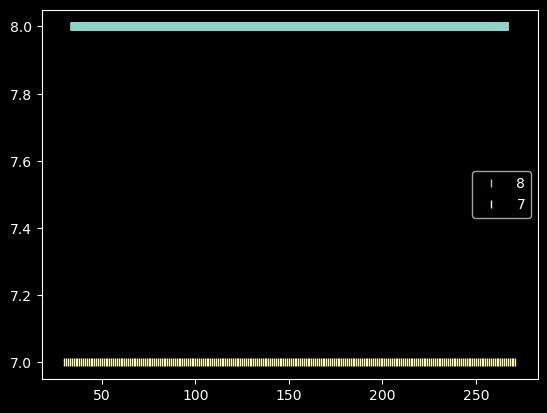

In [255]:
for ch in ([8,7]):
    # plt.xlim(65,75)
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch)
plt.legend()


In [256]:
# Convert the values to float
pellet_detected_frame = [float(frame) for frame in pellet_detected_frame]
pellet_delivery_frame = [float(frame) for frame in pellet_delivery_frame]


In [257]:
detected_timestamps


[67.56483333333334,
 102.11083333333333,
 121.3675,
 155.55353333333332,
 190.33953333333332,
 224.5122,
 253.70396666666667]

In [258]:
delivery_timestamps

[67.8115,
 102.35756666666667,
 121.6209,
 155.80688985632227,
 190.69961241533935,
 253.9707]

In [259]:
pellet_delivery_seconds

[34.11333333333334,
 68.65333333333334,
 87.91333333333333,
 122.09333333333333,
 156.98,
 220.24]

In [260]:
pellet_detected_seconds

[33.86666666666667,
 68.40666666666667,
 87.66,
 121.84,
 156.62,
 190.78666666666666,
 219.97333333333333]

In [261]:
detected_baseline = pellet_detected_seconds[0:2]
detected_perturbation = pellet_detected_seconds[2:4]
detected_washout = pellet_detected_seconds[4:6]
detected_baseline, detected_perturbation, detected_washout


([33.86666666666667, 68.40666666666667],
 [87.66, 121.84],
 [156.62, 190.78666666666666])

In [262]:
delivery_baseline = pellet_delivery_seconds[0:2]
delivery_perturbation = pellet_delivery_seconds[2:4]
delivery_washout = pellet_delivery_seconds[4:6]
delivery_baseline, delivery_perturbation, delivery_washout

([34.11333333333334, 68.65333333333334],
 [87.91333333333333, 122.09333333333333],
 [156.98, 220.24])

In [263]:
stimuli_times = {'pellet_detected_baseline':detected_baseline,
                'pellet_delivery_baseline':delivery_baseline,
                'pellet_detected_perturbation':detected_perturbation,
                'pellet_delivery_perturbation':delivery_perturbation,
                'pellet_detected_washout':detected_washout,
                'pellet_delivery_washout':delivery_washout,
                'all_frames_sideCam':frame_numbers,
                'frames_in_seconds_openEphys':frames_in_seconds_open_ephys,

                  }




### Conver values to floats, for code to work, idk why

In [264]:
# Convert the 'frames' values to float
stimuli_times['all_frames_sideCam'] = [float(frame) for frame in stimuli_times['all_frames_sideCam']]


# Now, the 'frames' values are in float format
print(stimuli_times['all_frames_sideCam'])

[0.006666666666666667, 0.013333333333333334, 0.02, 0.02666666666666667, 0.03333333333333333, 0.04, 0.04666666666666667, 0.05333333333333334, 0.06, 0.06666666666666667, 0.07333333333333333, 0.08, 0.08666666666666667, 0.09333333333333334, 0.1, 0.10666666666666667, 0.11333333333333333, 0.12, 0.12666666666666668, 0.13333333333333333, 0.14, 0.14666666666666667, 0.15333333333333332, 0.16, 0.16666666666666666, 0.17333333333333334, 0.18, 0.18666666666666668, 0.19333333333333333, 0.2, 0.20666666666666667, 0.21333333333333335, 0.22, 0.22666666666666666, 0.23333333333333334, 0.24, 0.24666666666666667, 0.25333333333333335, 0.26, 0.26666666666666666, 0.2733333333333333, 0.28, 0.2866666666666667, 0.29333333333333333, 0.3, 0.30666666666666664, 0.31333333333333335, 0.32, 0.32666666666666666, 0.3333333333333333, 0.34, 0.3466666666666667, 0.35333333333333333, 0.36, 0.36666666666666664, 0.37333333333333335, 0.38, 0.38666666666666666, 0.3933333333333333, 0.4, 0.4066666666666667, 0.41333333333333333, 0.42,

In [265]:
# Convert the 'frames' values to float
stimuli_times['pellet_delivery_sideCam_frame_number'] = [float(frame) for frame in stimuli_times['pellet_delivery_sideCam_frame_number']]


# Now, the 'frames' values are in float format
print(stimuli_times['pellet_delivery_sideCam_frame_number'])

KeyError: 'pellet_delivery_sideCam_frame_number'

In [ ]:


#stimulus list
stimuli = {'none': None,
           } 

## Assemble NWB

In [ ]:
# !pip install pynwb

In [ ]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [266]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

nwbfile = NWBFile('Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data', 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Christie Lab',
                  institution='University of Colorado',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

add stimulus information

In [267]:
for stim in stimuli_times.keys():
    nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
                      np.array(stimuli_times[stim])[-1]+3.,
                      [stim])

In [268]:
nwbfile

root pynwb.file.NWBFile at 0x2084085030416
Fields:
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_baseline,
    pellet_delivery_perturbation,
    pellet_delivery_washout,
    pellet_detected_baseline,
    pellet_detected_perturbation,
    pellet_detected_washout
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 8, 18, 8, 55, 687534, tzinfo=tzlocal())]
  identifier: G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001
  institution: University of Colorado
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id: test_2024-01-07_21-27-07_001
  session_start_time: 2024-01-08 18:08:55.686601-07:00
  timestamps_reference_time: 2024-01-08 18:08:55.686601-07:00

In [269]:
nwbfile.add_trial_column('stimulus', 'the event occuring during this trial')

#optogenetic pertibation
nwbfile.add_trial_column('optogenetics_LED_state', 'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in optogenetics_states field of NWB')


#arbMatrix and scene flicker
# nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix or list of images')

stim_vals = {'optogenetics_LED_state':-1,
       
}

stim = 'pellet_detected_baseline'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,
                 

                     )
    

stim = 'pellet_detected_perturbation'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=1,

                     )
    
stim = 'pellet_detected_washout'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    


stim = 'pellet_delivery_baseline'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,
                 

                     )
    

stim = 'pellet_delivery_perturbation'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=1,

                     )
    
stim = 'pellet_delivery_washout'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
    
stim = 'all_frames_sideCam'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )
    
    
stim = 'frames_in_seconds_openEphys'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    nwbfile.add_trial(start_time=trial_start,  stop_time=trial_start, stimulus=stim,
                     optogenetics_LED_state=0,

                     )

## Check the trials dataframe

In [270]:
df = nwbfile.trials.to_dataframe()

In [271]:
df

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,33.866667,33.866667,pellet_detected_baseline,0
1,68.406667,68.406667,pellet_detected_baseline,0
2,87.660000,87.660000,pellet_detected_perturbation,1
3,121.840000,121.840000,pellet_detected_perturbation,1
4,156.620000,156.620000,pellet_detected_washout,0
...,...,...,...,...
69841,232.826667,232.826667,frames_in_seconds_openEphys,0
69842,232.833333,232.833333,frames_in_seconds_openEphys,0
69843,232.840000,232.840000,frames_in_seconds_openEphys,0


In [272]:
base_df = df[df['stimulus'] == 'pellet_detected_baseline']
detected_pert_df = df[df['stimulus'] == 'pellet_detected_perturbation']
wash_df = df[df['stimulus'] == 'pellet_detected_washout']


base_df, detected_pert_df, wash_df

(    start_time  stop_time                  stimulus  optogenetics_LED_state
 id                                                                         
 0    33.866667  33.866667  pellet_detected_baseline                       0
 1    68.406667  68.406667  pellet_detected_baseline                       0,
     start_time  stop_time                      stimulus  \
 id                                                        
 2        87.66      87.66  pellet_detected_perturbation   
 3       121.84     121.84  pellet_detected_perturbation   
 
     optogenetics_LED_state  
 id                          
 2                        1  
 3                        1  ,
     start_time   stop_time                 stimulus  optogenetics_LED_state
 id                                                                         
 4   156.620000  156.620000  pellet_detected_washout                       0
 5   190.786667  190.786667  pellet_detected_washout                       0)

In [273]:
base_df = df[df['stimulus'] == 'pellet_delivery_baseline']
delivery_pert_df = df[df['stimulus'] == 'pellet_delivery_perturbation']
wash_df = df[df['stimulus'] == 'pellet_delivery_washout']


base_df, delivery_pert_df, wash_df

(    start_time  stop_time                  stimulus  optogenetics_LED_state
 id                                                                         
 6    34.113333  34.113333  pellet_delivery_baseline                       0
 7    68.653333  68.653333  pellet_delivery_baseline                       0,
     start_time   stop_time                      stimulus  \
 id                                                         
 8    87.913333   87.913333  pellet_delivery_perturbation   
 9   122.093333  122.093333  pellet_delivery_perturbation   
 
     optogenetics_LED_state  
 id                          
 8                        1  
 9                        1  ,
     start_time  stop_time                 stimulus  optogenetics_LED_state
 id                                                                        
 10      156.98     156.98  pellet_delivery_washout                       0
 11      220.24     220.24  pellet_delivery_washout                       0)

## add optogenetics

In [274]:
delivery_pert_df
opto_on_times = delivery_pert_df['start_time'].to_numpy()
opto_off_times = [value + 0.1 for value in opto_on_times]

opto_on_times, opto_off_times


(array([ 87.91333333, 122.09333333]), [88.01333333333332, 122.19333333333333])

In [275]:
# frame_events 

# opto_off_times = detected_pert_df[camera_df.state==0].timestamp
# opto_on_times = camera_df[camera_df.state==1].timestamp

In [276]:
opto_states = pynwb.epoch.TimeIntervals(
    name="optogenetics_states",
    description="intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, ",
)

opto_states.add_column(name="power", description="15mW")
opto_states.add_column(name="wavelength", description="470nm")

for i in range(np.array(opto_off_times).shape[0]):
    opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

nwbfile.add_time_intervals(opto_states)

optogenetics_states pynwb.epoch.TimeIntervals at 0x2084097046800
Fields:
  colnames: ['start_time' 'stop_time' 'power' 'wavelength']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    power <class 'hdmf.common.table.VectorData'>,
    wavelength <class 'hdmf.common.table.VectorData'>
  )
  description: intervals for optical fiber, fiber at power = ?? on what system. fiber 470nm, 
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

### add ephys data
first add electrodes and raw data link

In [277]:
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data


In [278]:
recording_folder = r"G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001\Record Node 103\experiment1\recording1\continuous"

In [279]:
df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)
df_units.iloc[0]

C:\Users\denmanlab\AppData\Roaming\Python\Python311\site-packages\dlab\nwbtools.py:481: RuntimeWarning: invalid value encountered in divide
  weights = weights/np.max(weights)


probe                                                               A
unit_id                                                             0
group                                                            good
depth                                                     1328.257815
xpos                                                        29.080078
zpos                                                      3668.257815
no_spikes                                                           4
KSlabel                                                           mua
KSamplitude                                                     378.6
KScontamination                                                 100.0
template            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
waveform_weights    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
amplitudes          [13.442464828491211, 8.229437828063965, 8.6361...
times               [40.89553085421978, 42.10320762035063, 104.964...
Name: 0, dtype: obje

# Do not RUN code bellow, Makes random spike times

In [280]:

# Function to generate random spike times
def generate_random_spike_times():
    return np.sort(np.random.uniform(0, 230, 3000))

# Create a new DataFrame to hold the expanded spike times
expanded_spike_times = pd.DataFrame({'times': [generate_random_spike_times() for _ in range(len(df_units))]})

# Now, you can replace the 'spike_times' column in your original DataFrame with the expanded_spike_times
df_units['times'] = expanded_spike_times['times']
df_units.iloc[0].times[50:70]

array([3.16567558, 3.20411236, 3.37821154, 3.3838333 , 3.40788677,
       3.42123594, 3.44275328, 3.44364413, 3.59042957, 3.74814544,
       3.85251558, 3.98398021, 4.05494016, 4.10524028, 4.11850881,
       4.16089717, 4.33535308, 4.35462145, 4.37678358, 4.68908214])

# Do not RUN code above, Makes random spike times

In [281]:
probes = ['A']
locations = ['M1']
descriptions = ['Neuropixels1.0'] 

In [282]:
device = nwbfile.create_device(name='ChristieLab Rig_2')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

In [283]:
nwbfile

root pynwb.file.NWBFile at 0x2084085030416
Fields:
  devices: {
    ChristieLab Rig_2 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    probe0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epoch_tags: {
    all_frames_sideCam,
    frames_in_seconds_openEphys,
    pellet_delivery_baseline,
    pellet_delivery_perturbation,
    pellet_delivery_washout,
    pellet_detected_baseline,
    pellet_detected_perturbation,
    pellet_detected_washout
  }
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Chritie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  experimenter: ['grh']
  file_create_date: [datetime.datetime(2024, 1, 8, 18, 8, 55, 687534, tzinfo=tzlocal())]
  identifier: G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_001
  institution: University of Colorado
  intervals: {
    optogenetics_states <class 'pynwb.epoch.TimeIntervals'>
  }
  lab: Christie Lab
  session_description: Reaching Pertibation Task, Christie Lab, University of Colorado Anschutz. Test of reaching pertibation task. checking aligmnet of neural data with video data
  session_id: test_2024-01-07_21-27-07_001
  session_start_time: 2024-01-08 18:08:55.686601-07:00
  timestamps_reference_time: 2024-01-08 18:08:55.686601-07:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>

In [284]:
# nwbfile.add_unit_column('location', 'the anatomical location of this unit')
# nwbfile.add_unit_column('quality', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_ISIviolations', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_sn', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_distance', 'the quality for the inference of this unit')

nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     spike_times=unit_row.times,
                    #  electrodes = np.where(unit_row.waveform_weights > 0)[0],
                    #  waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.zpos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.KSamplitude,
                     KScontamination= unit_row.KScontamination,
                     probe= unit_row.probe,
                    )

In [301]:
# nwb_path = r'C://Users//denmanlab//Desktop//eOPN3_33_nwb.nwb'
nwb_path = r"G:\Grant\jason_christie\sorted_recordings\test_2024-01-07_21-27-07_003"

with pynwb.NWBHDF5IO(nwb_path, 'w') as io:
    io.write(nwbfile)

# Load data

In [302]:
nwb = h5py.File(nwb_path,'r')

In [303]:
nwb

<HDF5 file "test_2024-01-07_21-27-07_003" (mode r)>

# browse with NWBwidget

In [304]:
# !pip install nwbwidgets

In [305]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [306]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [307]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [308]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

## flash responses 
[no probes in this nwb yet having data issue with my local copy]

In [309]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1 = df_units

df1.spike_times.values[0][3000]




IndexError: index 3000 is out of bounds for axis 0 with size 3000

In [ ]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,33.866667,33.866667,pellet_detected_baseline,0
1,68.406667,68.406667,pellet_detected_baseline,0
2,87.660000,87.660000,pellet_detected_perturbation,0
3,121.840000,121.840000,pellet_detected_perturbation,0
4,156.620000,156.620000,pellet_detected_washout,0
...,...,...,...,...
69841,232.826667,232.826667,frames_in_seconds_openEphys,0
69842,232.833333,232.833333,frames_in_seconds_openEphys,0
69843,232.840000,232.840000,frames_in_seconds_openEphys,0


plot one unit
### label==2 "good"
### label==1 "mua"
### label==0 'noise'

In [311]:
df_units[df_units.probe=='A'][df_units.label==2] # these are the "good" labelled units

,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,
0,1328.257815,29.080078,3668.257815,2,1,378.6,100.0,A,"[0.06469288425042463, 0.13180635729601486, 0.1..."
1,NaN,NaN,NaN,2,1,NaN,100.0,A,"[0.020630185292006553, 0.07505847527114362, 0...."
2,NaN,NaN,NaN,2,1,363.6,inf,A,"[0.09287479236798069, 0.16238752646817511, 0.1..."
3,NaN,NaN,NaN,2,1,469.6,0.0,A,"[0.1326121963507365, 0.14027127480165436, 0.14..."


In [312]:
df_units[df_units.probe=='B'][df_units.label==2] # these are the "good" labelled units

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_21856\4126575258.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_units[df_units.probe=='B'][df_units.label==2] # these are the "good" labelled units


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,


In [313]:
df_units[df_units.probe=='C'][df_units.label==2] # these are the "good" labelled units

C:\Users\denmanlab\AppData\Local\Temp\ipykernel_21856\2433156616.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_units[df_units.probe=='C'][df_units.label==2] # these are the "good" labelled units


,depth,xpos,ypos,label,KSlabel,KSamplitude,KScontamination,probe,spike_times
id,,,,,,,,,


# .values[::2]
### is Equal too the brightdark flashes

IndexError: index 0 is out of bounds for axis 0 with size 0

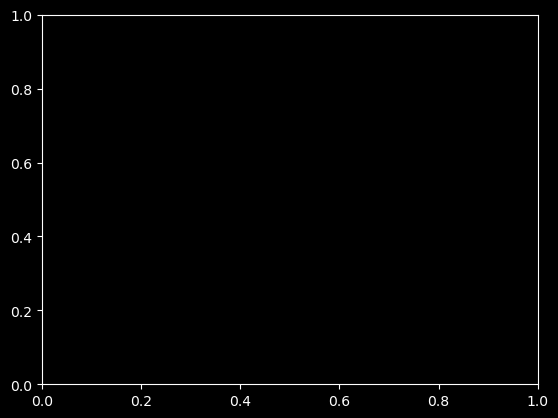

In [314]:
unit=869
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values[::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash_opto') ].start_time.values[::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')

# .values[1::2]
### is Equal too the dark flashes

In [315]:
df_stim

,start_time,stop_time,stimulus,optogenetics_LED_state
id,,,,
0,33.866667,33.866667,pellet_detected_baseline,0
1,68.406667,68.406667,pellet_detected_baseline,0
2,87.660000,87.660000,pellet_detected_perturbation,0
3,121.840000,121.840000,pellet_detected_perturbation,0
4,156.620000,156.620000,pellet_detected_washout,0
...,...,...,...,...
69841,232.826667,232.826667,frames_in_seconds_openEphys,0
69842,232.833333,232.833333,frames_in_seconds_openEphys,0
69843,232.840000,232.840000,frames_in_seconds_openEphys,0


C:\Users\denmanlab\AppData\Roaming\Python\Python311\site-packages\dlab\psth_and_raster.py:202: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes.set_ylim(len(triggers),1)


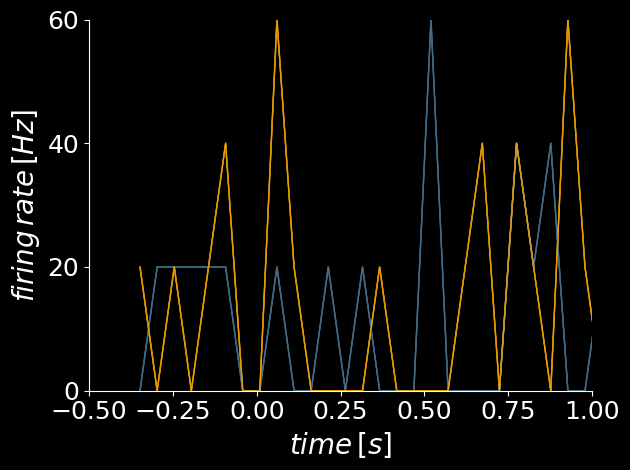

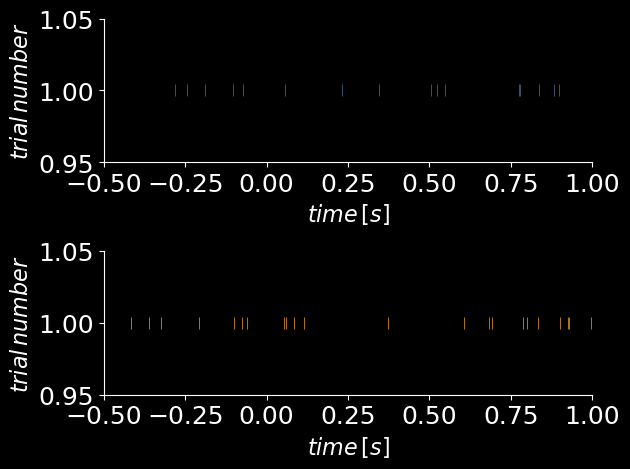

In [316]:
unit=1
df1 = df_units[df_units.probe=='A'][df_units.label==2]
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              ymax=60,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_baseline') & (df_stim.optogenetics_LED_state == 0)].start_time.values[1::2],
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='pellet_detected_perturbation') ].start_time.values[1::2],
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')